# 回归树

**回归树（Regression Tree）**是一种用于预测连续型数值目标变量的决策树模型。它是 CART（Classification and Regression Trees） 算法的一个分支，专门用于处理回归问题。

## 回归树核心思想

将特征空间递归地划分为若干个子区域（即矩形），在每个子区域中使用该区域内样本的**目标变量平均值**作为预测值。

## 回归树构建流程

- 初始化：从所有数据出发
- 选择最优划分变量和切分点：
    - 遍历每个特征的每个可能划分点
        - 连续特征：排序后取相邻值的中点
        - 类别特征：按类别子集划分
    - 计算划分后的两个子区域的残差平方和（RSS）
        $$\text{RSS} = \sum_{i \in R_1}(y_i - \bar{y}_1)^2 + \sum_{i \in R_2}(y_i - \bar{y}_2)^2$$
    - 选择使 RSS 最小的划分
- 递归划分子区域，直到满足停止条件：
    - 达到最大深度
    - 样本数量太少
    - 无法再有效划分
- 预测输出：
    - 每个叶子节点的预测值为该节点内所有样本的**目标均值**

# 回归树手算案例

## 案例背景

使用一个小数据集来预测房价（单位：万元），特征包括：
- 面积（m²）
- 卧室数量（个）
- 价格（目标变量，单位：万元）

| 编号 | 面积（㎡） | 卧室数 | 房价（万元） |
| -- | ----- | --- | ------ |
| 1  | 50    | 1   | 150    |
| 2  | 60    | 2   | 180    |
| 3  | 70    | 2   | 190    |
| 4  | 80    | 3   | 220    |
| 5  | 100   | 3   | 260    |

## 根节点计算

### 可能划分方式

数据集特征一共两个：面积、卧室数。需要枚举并且计算所有可能划分方式。

#### 划分1：按“面积”划分（连续变量）
面积从小到大排序依次为：50, 60, 70, 80, 100

连续变量划分点在中间取值

- `s`=55
- `s`=65
- `s`=75
- `s`=90

#### 划分2：按“卧室数”划分（离散变量）
卧室数为 1, 2, 3

离散变量划分点为各离散变量取值

- 卧室数 ≤ 1 vs >1
- 卧室数 ≤ 2 vs >2

### 计算各划分的 RSS（残差平方和）

依次尝试每个划分点，计算左右区域的平均值和 RSS。

#### 尝试划分 1：`s`=55

- 左区域：样本 1（面积=50，房价=150）
    - 左均值：150
    - 左区域RSS = 0
- 右区域：样本 2、3、4、5（面积60、70、80、100，房价=180, 190, 220, 260）
    - 右均值：$\bar{y}_R = \frac{180 + 190 + 220 + 260}{4} = 212.5$
    - 右区域 RSS：$(180 - 212.5)^2 + (190 - 212.5)^2 + (220 - 212.5)^2 + (260 - 212.5)^2 = 1056.25 + 506.25 + 56.25 + 2256.25 = 3875$
- $总 RSS = 0 + 3875 = 3875$

#### 尝试划分 2：`s`=65

- 左区域：样本 1、2（面积50, 60；房价=150, 180）
    - 左均值：$\frac{150+180}{2} = 165$
    - 左区域RSS = $(150-165)^2 + (180-165)^2 = 225 + 225 = 450$
- 右区域：样本 3、4、5（面积70、80、100；房价=190, 220, 260）
    - 右均值：$\frac{190+220+260}{3} = 223.33$
    - 右区域 RSS：$(190 - 223.33)^2 + (220 - 223.33)^2 + (260 - 223.33)^2 \approx 1111.11 + 11.11 + 1344.44 = 2466.66$
- $总 RSS = 450 + 2466.66 = 2916.66$

#### 尝试划分 3：`s`=75

- 左区域：样本 1、2、3（面积50, 60、70；房价=150, 180, 190）
    - 左均值：$\frac{150+180+190}{3} = 173.33$
    - 左区域RSS = $(150-173.33)^2 + (180-173.33)^2 + (190-173.33)^2 ≈ 544.44 + 44.44 + 277.77 = 866.65$
- 右区域：样本 4、5（面积80、100；房价=220, 260）
    - 右均值：$\frac{220+260}{2} = 240$
    - 右区域 RSS：$(220-240)^2 + (260-240)^2 = 400 + 400 = 800$
- $总 RSS = 866.65 + 800 = 1666.65$

#### 尝试划分 4：`s`=90

- 左区域：样本 1、2、3、4（面积50, 60、70、80；房价=150, 180, 190, 220）
    - 左均值：$\frac{150+180+190+220}{4} = 185$
    - 左区域RSS = $(150-185)^2 + (180-185)^2 + (190-185)^2 + (220-185)^2 = 1225 + 25 + 25 + 1225 = 2500$
- 右区域：样本 5（面积100；房价=260）
    - 右均值：$260$
    - 右区域 RSS：$0$
- $总 RSS = 2500 + 0 = 2500$

#### 尝试划分 5：卧室数 ≤ 1 vs >1

- 左区域：样本 1（卧室=1，房价=150）
    - 左均值：$150$
    - 左区域RSS = $0$
- 右区域：样本 2-5（卧室≥2）
    - 右均值：$\frac{180+190+220+260}{4} = 212.5$
    - 右区域 RSS：$(180 - 212.5)^2 + (190 - 212.5)^2 + (220 - 212.5)^2 + (260 - 212.5)^2 = 1056.25 + 506.25 + 56.25 + 2256.25 = 3875$
- $总 RSS = 0 + 3875 = 3875$

#### 尝试划分 6：卧室数 ≤ 2 vs >2

- 左区域：样本 1、2、3（卧室=1或2，房价=150, 180, 190）
    - 左均值：$\frac{150+180+190}{3} = 173.33$
    - 左区域RSS = $(150-173.33)^2 + (180-173.33)^2 + (190-173.33)^2 ≈ 544.44 + 44.44 + 277.77 = 866.65$
- 右区域：样本 4、5（卧室=3，房价=220, 260）
    - 右均值：$\frac{220+260}{2} = 240$
    - 右区域 RSS：$(220-240)^2 + (260-240)^2 = 400 + 400 = 800$
- $总 RSS = 866.65 + 800 = 1666.65$

#### 最优划分结果

- 最佳划分变量：面积 
- 最佳划分点：面积 ≤ 75 
- 最小 RSS ≈ 1666.65 
- 左区域：样本 1、2、3（面积50, 60、70；房价=150, 180, 190）
- 右区域：样本 4、5（面积80、100；房价=220, 260）

## 各子区域计算

### 左子区域（样本 1, 2, 3）

| 编号 | 面积 | 卧室 | 房价  |
| -- | -- | -- | --- |
| 1  | 50 | 1  | 150 |
| 2  | 60 | 2  | 180 |
| 3  | 70 | 2  | 190 |


#### 划分1：按“面积”划分（连续变量）
面积从小到大排序依次为：50, 60, 70

连续变量划分点在中间取值

- `s`=55
- `s`=65

#### 划分2：按“卧室数”划分（离散变量）
卧室数为 1, 2

离散变量划分点为各离散变量取值

- 卧室数 ≤ 1 vs >1

#### 尝试划分 1：`s`=55

- 左区域：样本 1（面积=50，房价=150）
    - 左均值：150
    - 左区域RSS = 0
- 右区域：样本 2、3（面积60、70，房价=180, 190）
    - 右均值：$\bar{y}_R = \frac{180 + 190}{2} = 185$
    - 右区域 RSS：$(180 - 185)^2 + (190 - 185)^2 = 25 + 25 = 50$
- $总 RSS = 0 + 50 = 50$

#### 尝试划分 2：`s`=65

- 左区域：样本 1、2（面积=50、60，房价=150, 180）
    - 左均值：165
    - 左区域RSS = 225 + 225 = 450
- 右区域：样本 3（面积70，房价=190）
    - 右均值：190
    - 右区域 RSS：0
- $总 RSS = 450 + 0 = 450$

#### 尝试划分 3：卧室数 ≤ 1 vs >1

- 左区域：样本 1（卧室=1，房价=150）
    - 左均值：$150$
    - 左区域RSS = $0$
- 右区域：样本 2、3（卧室≥2）
    - 右均值：$\frac{180+190}{2} = 185$
    - 右区域 RSS：$(180 - 185)^2 + (190 - 185)^2 = 50$
- $总 RSS = 0 + 50 = 50$

#### 最优划分结果

左子区域的最佳划分是：
- 最佳划分变量：面积 
- 最佳划分点：面积 ≤ 55 
- 最小 RSS ≈ 50
- 左区域：样本 1（面积50；房价=150），平均值150
- 右区域：样本 2、3（面积60、70；房价=180, 190），平均值185

### 右子区域（样本 4, 5）

| 编号 | 面积  | 卧室 | 房价  |
| -- | --- | -- | --- |
| 4  | 80  | 3  | 220 |
| 5  | 100 | 3  | 260 |

#### 划分1：按“面积”划分（连续变量）
面积从小到大排序依次为：80, 100

连续变量划分点在中间取值

- `s`=90

#### 划分2：按“卧室数”划分（离散变量）
卧室数为 3

无需划分

#### 尝试划分 1：`s`=90

- 左区域：样本 4（面积=80，房价=220）
    - 左均值：220
    - 左区域RSS = 0
- 右区域：样本 5（面积100，房价=260）
    - 右均值：260
    - 右区域 RSS：0
- $总 RSS = 0 + 0 = 0$

#### 最优划分结果

右子区域的最佳划分是：
- 最佳划分变量：面积 
- 最佳划分点：面积 ≤ 90
- 最小 RSS ≈ 0
- 左区域：样本 4（面积80；房价=220），平均值220
- 右区域：样本 5（面积100；房价=260），平均值260

## 回归树计算结果

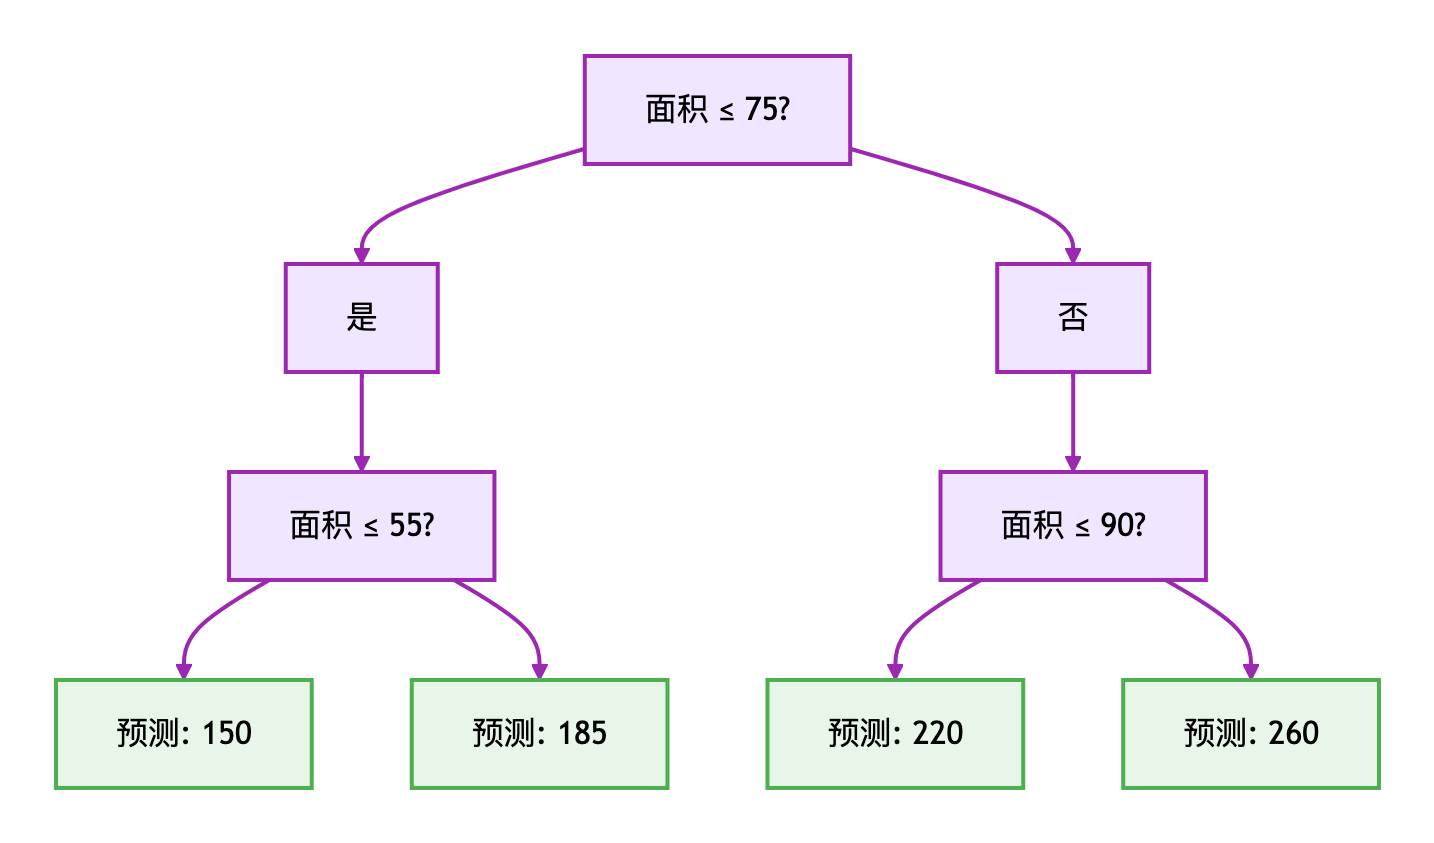

In [1]:
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C26 决策树模型Decision Tree——回归树图1.png', width=600, height=400)


# 回归树sklearn实现

## DecisionTreeRegressor

- `criterion`: 分裂依据
    - squared_error: 最小化均方误差（MSE），默认值
    - absolute_error: 最小化绝对误差（MAE，鲁棒性更强）
- `max_depth`: 树的最大深度
- `min_samples_split`: 节点分裂最小样本数，默认=2（即每个叶子节点至少需要2个样本）
- `min_samples_leaf`: 叶节点最小样本数
- `max_features`: 最大特征数
- `max_leaf_nodes`: 最多叶子节点数
- `ccp_alpha`: 剪枝参数α，控制叶子数量与复杂度。越大剪枝越强，模型越简单。默认值为0（不剪枝）
- `random_state`: 随机数种子

## 波士顿房价数据集

**Boston Housing Dataset（波士顿房价数据集）**是一个回归数据集，该数据集包含506个样本，每个样本有13个特征，该数据集用于根据犯罪率、房屋房间数、空气污染等因素对波士顿地区的房价进行预测。

- MEDV：住房价格中位数（单位：千美元）
- CRIM：该镇的人均犯罪率
- ZN：住宅用地超过 25000 平方英尺的比例（%）
- INDUS：非零售商用土地比例（%）
- CHAS：是否靠近查尔斯河（1=是，0=否）
- NOX：一氧化氮浓度（空气污染指标，单位：ppm）
- RM：每栋住宅的平均房间数
- AGE：1940 年之前建成房屋的比例（%）
- DIS：到波士顿五个中心区域的加权距离
- RAD：距离高速公路的便利指数
- TAX：每 $10,000 资产的房产税率
- PTRATIO：城镇师生比例
- B：黑人比例指标
- LSTAT：低收入人群比例（%）

In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 加载波士顿房价数据集
# 该数据集包含506个样本，每个样本有13个特征，用于预测房价
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # 特征变量
y = boston.target  # 目标变量（房价）
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

## 代码实现

MSE: 10.4161
RMSE: 3.2274
MAE: 2.3941
MAPE: 12.79%
R² Score: 0.8580


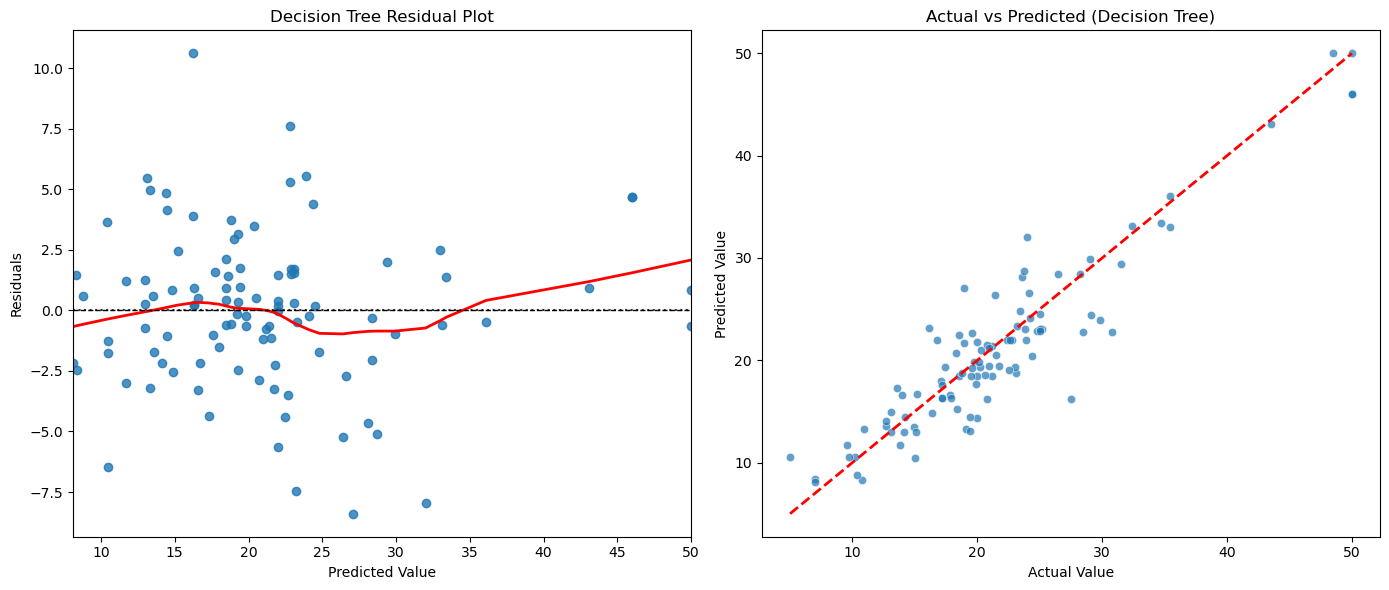

In [3]:
# 直接划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义决策树回归模型
dt_regressor = DecisionTreeRegressor(
    random_state=42            # 确保结果可复现
)

# 训练模型
dt_regressor.fit(X_train, y_train)

# 进行预测
y_pred = dt_regressor.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# 输出评估指标
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# 计算残差
residuals = y_test - y_pred

# 可视化部分
plt.figure(figsize=(14, 6))

# 1. 残差图
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")

# 2. 实际值 vs 预测值
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted (Decision Tree)")

plt.tight_layout()
plt.show()

# 决策树可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [4]:
# 决策树可视化
# 文本形式展示决策规则
tree_rules = export_text(dt_regressor, feature_names=boston.feature_names)
print("\n决策规则:")
print(tree_rules)


决策规则:
|--- RM <= 6.94
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- CRIM <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- CRIM >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- DIS >  1.38
|   |   |   |--- RM <= 6.54
|   |   |   |   |--- RM <= 6.10
|   |   |   |   |   |--- RAD <= 1.50
|   |   |   |   |   |   |--- TAX <= 288.50
|   |   |   |   |   |   |   |--- value: [11.90]
|   |   |   |   |   |   |--- TAX >  288.50
|   |   |   |   |   |   |   |--- RM <= 5.87
|   |   |   |   |   |   |   |   |--- value: [17.10]
|   |   |   |   |   |   |   |--- RM >  5.87
|   |   |   |   |   |   |   |   |--- value: [19.40]
|   |   |   |   |   |--- RAD >  1.50
|   |   |   |   |   |   |--- PTRATIO <= 17.85
|   |   |   |   |   |   |   |--- RM <= 5.21
|   |   |   |   |   |   |   |   |--- value: [15.30]
|   |   |   |   |   |   |   |--- RM >  5.21
|   |   |   |   |   |   |   |   |--- TAX <= 416.50
|   |   |   |   |   |   |   |   |   |--- PTRATIO <= 17.10
|   |   |   | 

## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

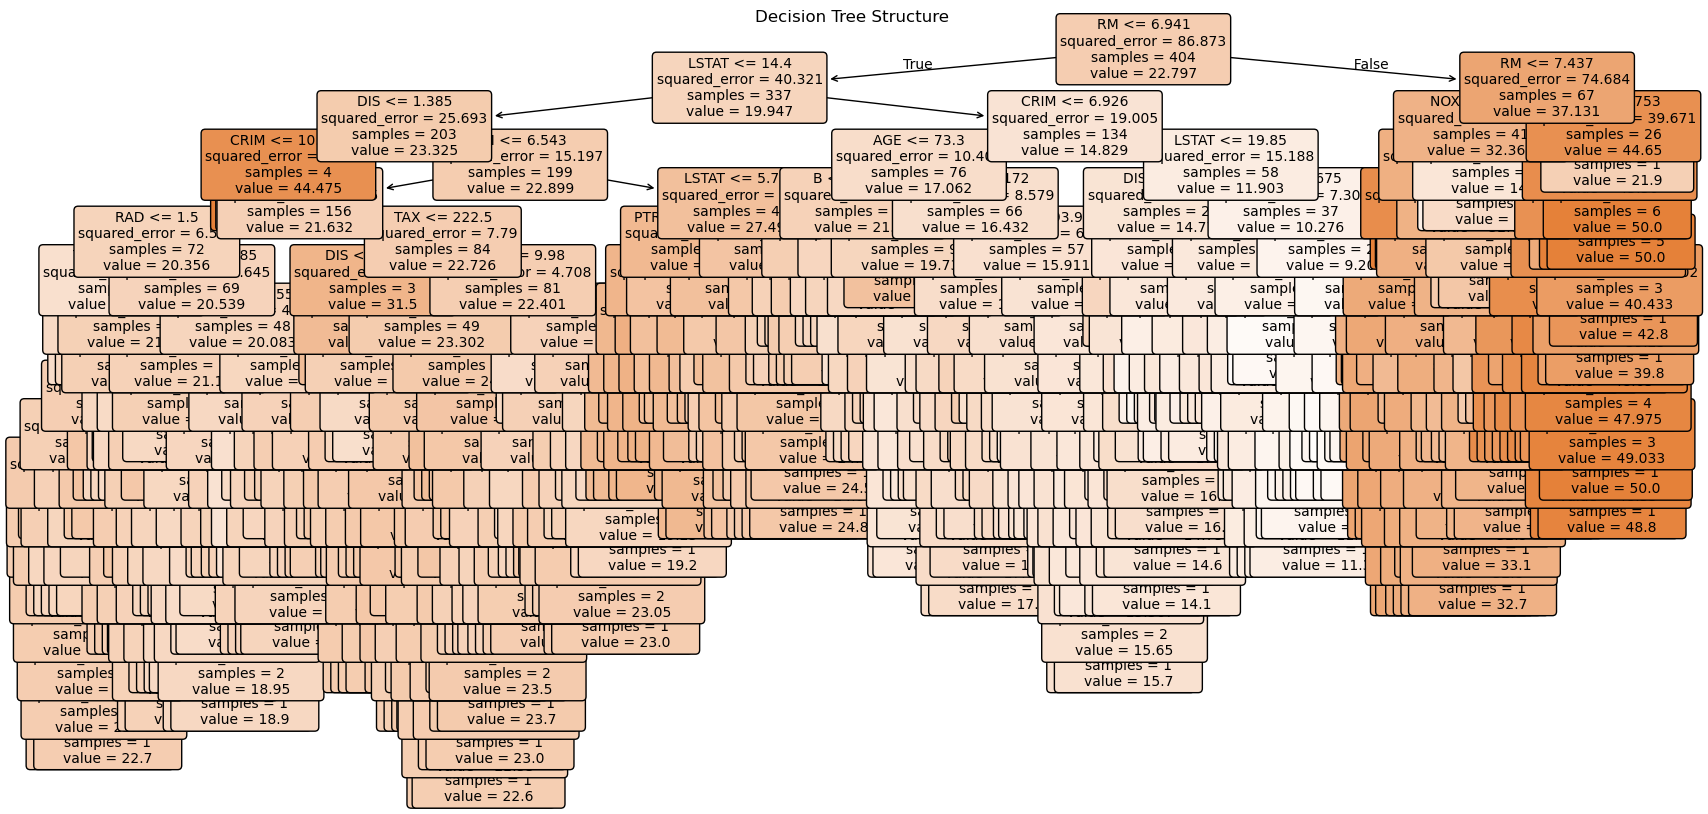

In [5]:
# 决策树可视化
plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor, 
    feature_names=boston.feature_names,
    filled=True,                # 填充颜色表示纯度
    rounded=True,               # 圆角边框
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

# 特征重要度

**特征重要性(feature importance)**是决策树模型中用于衡量各个特征对预测结果贡献程度的指标。
- 每次决策树在某特征上进行划分时，都会带来一定的分裂误差下降。 
- 把所有由该特征引起的分裂误差下降值累加，再进行归一化（总和为 1），即可得到特征重要度。
- 计算公式为：
$$\text{Feature Importance}_j = \sum_{t \in T_j} \frac{N_t}{N} \cdot \Delta \text{Impurity}_t$$
- 其中：
    - $T_j$：使用特征$j$进行划分的所有节点集合 
    - $N_t$：第$t$个节点的样本数量 
    - $N$：总样本数 
    - $\text{Impurity}_t$：该节点划分带来的分裂误差下降 

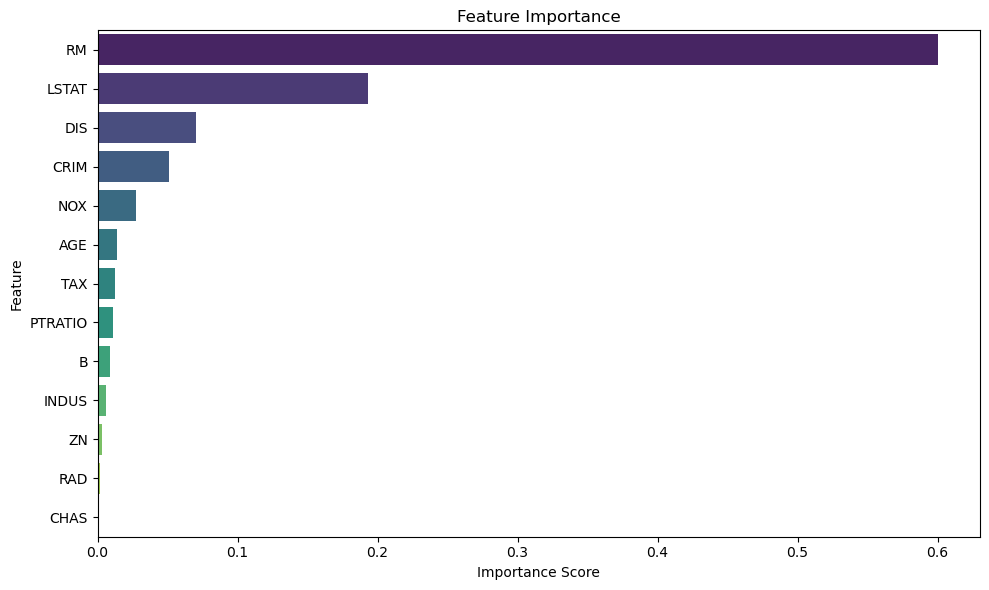

In [7]:
# 获取决策树模型中各特征的重要性分数
# feature_importances_属性返回一个数组，包含每个特征对预测的贡献度（值越大表示越重要）
feature_importance = dt_regressor.feature_importances_

importance_df = pd.DataFrame({
    'feature': boston.feature_names,        # 特征名称列
    'importance': feature_importance  # 对应的特征重要性分数
}).sort_values('importance', ascending=False)  # 按重要性降序排序

# 创建图形窗口，设置大小为10英寸宽×6英寸高
plt.figure(figsize=(10, 6))
# 使用seaborn绘制水平条形图
sns.barplot(
    x='importance',  # x轴为重要性分数
    y='feature',     # y轴为特征名称
    data=importance_df,  # 数据来源
    palette='viridis'  # 使用viridis颜色方案（黄-绿-蓝渐变）
)
plt.title('Feature Importance')  # 主标题
plt.xlabel('Importance Score')   # x轴标签（重要性分数）
plt.ylabel('Feature')           # y轴标签（特征名称）
plt.tight_layout()              # 自动调整子图参数，使图形元素不重叠
plt.show()                      # 显示图形